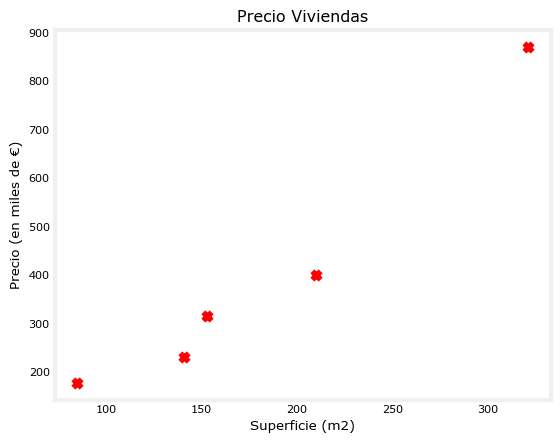

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients
from lab_utils_uni import *
plt.style.use('./deeplearning.mplstyle')

# x_train es la variable de entrada (superficie en metros cuadrados)
x_train = np.array([210, 141, 153, 85, 321])
# y_train es el objetivo (precio en miles de euros)
y_train = np.array([400, 232, 315, 178, 870])
# Dibuja los puntos de datos
plt.scatter(x_train, y_train, marker='x', c='r')
# Título
plt.title("Precio Viviendas")
# nombre eje y
plt.ylabel('Precio (en miles de €)')
# nombre eje x-axis
plt.xlabel('Superficie (m2)')
plt.show()

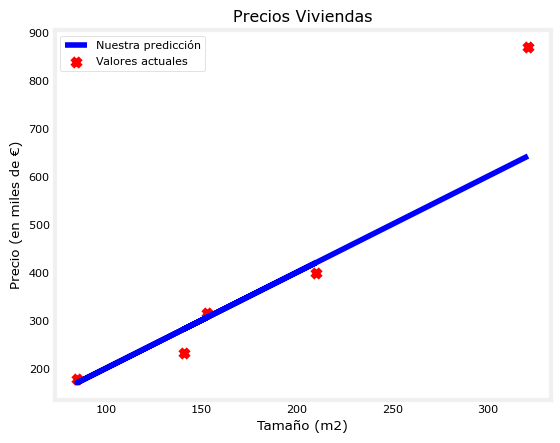

In [3]:
# Parámetros de la función que optimiza el resultado 
w = 2
b = .5

# Algoritmo del modelo Regresión Lineal
def compute_model_output(x, w, b):
    """
    Cálculo de la predicción en el modelo lineal
    Argumentos:
      x (ndarray (m,)): Dato, m ejemplos 
      w,b (scalar)    : parametros del modelo  
    Responde
      y (ndarray (m,)): valores objetivo
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb
tmp_f_wb = compute_model_output(x_train, w, b,)

# Dibuja nuestro modelo de predicción
plt.plot(x_train, tmp_f_wb, c='b',label='Nuestra predicción')

# Dibuja los datos
plt.scatter(x_train, y_train, marker='x', c='r',label='Valores actuales')

# Título
plt.title("Precios Viviendas")
# Eje y
plt.ylabel('Precio (en miles de €)')
# Eje x-
plt.xlabel('Tamaño (m2)')

plt.legend()
plt.show()

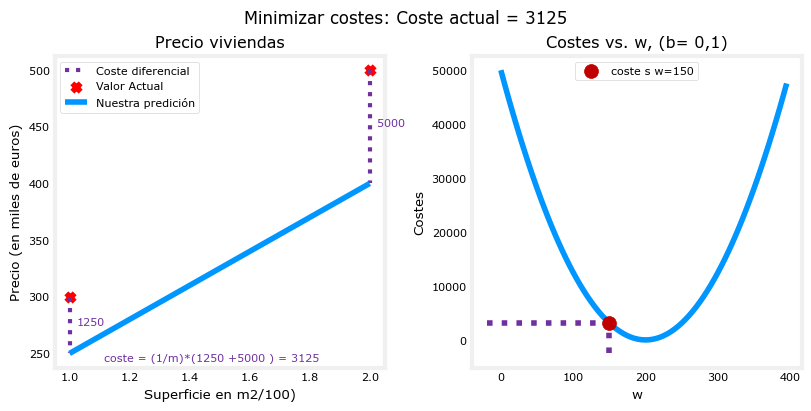

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

In [4]:
x_train = np.array([1, 2])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)
def compute_cost(x, y, w, b): 
    """
    Calcula la función de coste para una regresión lineal
    
    Argumentos:
      x (ndarray (m,)): Datos, m ejemplos 
      y (ndarray (m,)): Valores objetivo
      w,b (scalar)    : parametros del modelo 
    
    Rtorna
        total_cost (float): El resultado de usar w,b 
        como parámetros de la Regresión Lineal
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  
    
plt_intuition(x_train,y_train)
    

In [5]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

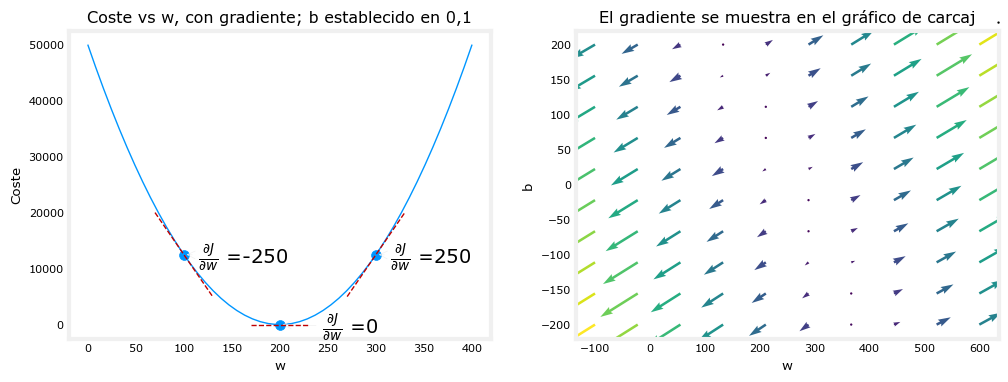

In [6]:
def compute_gradient(x, y, w, b): 
    """
    Calcula la función gradiente para 
    regresión lineal de una variable
    Argumentoss:
      x (ndarray (m,)): Datos, m ejemplos 
      y (ndarray (m,)): valores objetivo
      w,b (scalar)    : parametros modelo  
    Retorna
      dj_dw (scalar): Gradiente de coste w.r.t. de w
      dj_db (scalar): Gradiente de coste w.r.t. de b   
     """
    
    # numero de ejemplos de prueba
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [10]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Calculo del gradiente descente para obtener  w,b. 
    a través de la iteración con los datps y con
    el ratio de aprendizaje alpha
    
    Argumentos:
      x (ndarray (m,))  : Dats, m ejemplos 
      y (ndarray (m,))  : Valor objetivo
      w_in,b_in (scalar): Valores iniciales de los parámetros del modelo  
      alpha (float):     Ratio de aprendizaje
      num_iters (int):   numero de iteraciones del gradiente desdendente.
      cost_function:     función de coste
      gradient_function: función del gradiente descendente
      
    Retorna:
      w (scalar): Valor del parámetro despues de todas las iteracciones
      b (scalar): Valor del parámetro despues de todas las iteracciones
      J_history (List): Historia de los valores de coste
      p_history (list): Historia de los parámetros [w,b] 
      """
    
    # Un array para guardar el coste J y w's de cada iteración para el gráfico.
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculo del gradiente y actualizado de parámetros
        dj_dw, dj_db = gradient_function(x, y, w , b)   

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                           

        # guardar la función coste J en cada itercción.
        if i<100000:     
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # mostrar el coste a cada intervalo de 10 iteracciones.
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w, b, J_history, p_history

# inicializamos parametros
w_init = 0
b_init = 0
# Definimos número de iteraciones y alpha
iterations = 10000
tmp_alpha = 1.0e-2
# rejecutamos gradiente descenso
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")




Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


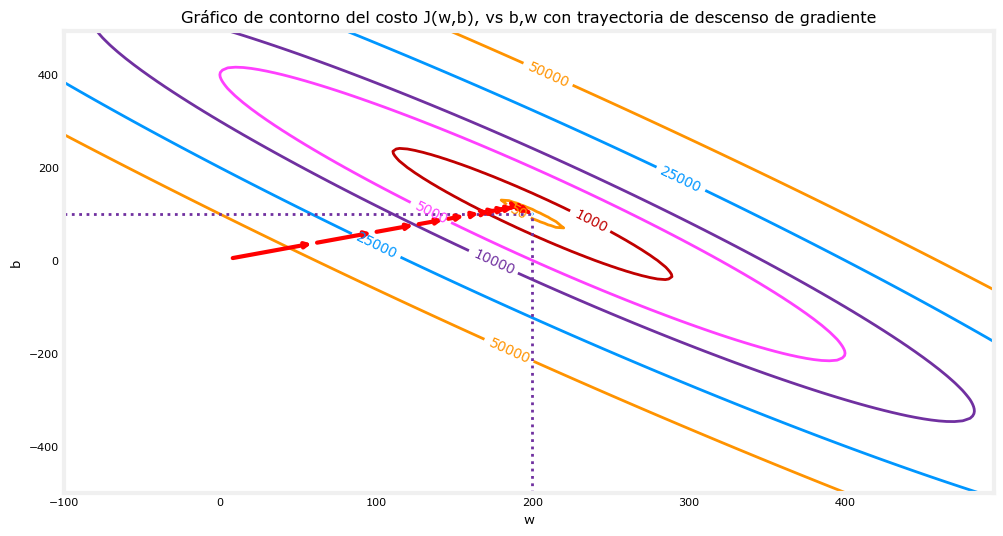

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)